# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [5]:
df=pd.read_csv("/Users/mahakkaurchhabra/Documents/University/ML (4th sem)/spam.csv",encoding = "ISO-8859-1")
#encoding = "ISO-8859-1"

# Analysing dataset

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

Model only works on numeric values (for prediction), so we need to convert the 'object' type to 'numeric' type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


describe( ) not beneficial since there's no numeric data yet.

# Data preprocessing 

##### Checking null values 

In [12]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dropping columns with null values

In [14]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace =True)

axis=0 -> dropping rows

axis=1 -> dropping columns

inplace = True -> performs operation on data and nothing is returned (i.e. permanent change in data)

inplace = False -> performs operation on data AND returns a new copy of data

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Renaming columns 

In [16]:
df.rename(columns={'v1':'result','v2':'sms'},inplace=True)

In [17]:
df.head()

,result,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Checking duplicate records/rows 

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [19]:
df.duplicated().describe()

count      5572
unique        2
top       False
freq       5169
dtype: object

In [20]:
df.duplicated().info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: None
Non-Null Count  Dtype
--------------  -----
5572 non-null   bool 
dtypes: bool(1)
memory usage: 5.6 KB


In [21]:
df[df.duplicated()]

,result,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


403 duplicate values

In [22]:
df.duplicated().sum()

403

In [23]:
df.shape

(5572, 2)

Removing duplicates 

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(5169, 2)

# EDA 

In [26]:
df.columns

Index(['result', 'sms'], dtype='object')

In [27]:
df['result'].value_counts()

ham     4516
spam     653
Name: result, dtype: int64

Data is unbalanced

In [28]:
# in %
df['result'].value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: result, dtype: float64

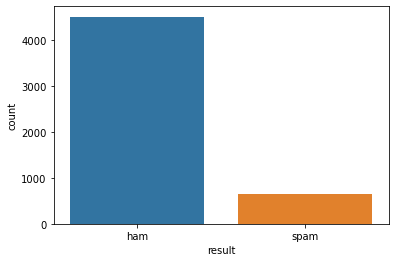

In [29]:
sns.countplot(x=df['result'])
plt.show()

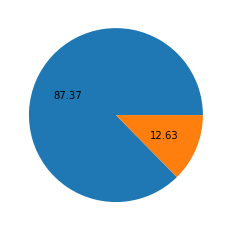

In [30]:
plt.pie(x=df['result'].value_counts(),autopct='%.2f')
plt.show()

# Feature Encoding

Converting text data into numeric form for ham and spam

Converting input variables to a vector

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['sms']).toarray()

In [32]:
X.shape

(5169, 8672)

In [33]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
y=df['result'].values

In [35]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [36]:
df['result']=df['result'].map({'spam':1,'ham':0})

In [37]:
y=df['result'].values

In [38]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
df['result'].unique()

array([0, 1])

In [40]:
df.head()

,result,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Train test split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape

(4135, 8672)

In [43]:
X_test.shape

(1034, 8672)

In [44]:
y_train.shape

(4135,)

In [45]:
y_test.shape

(1034,)

# Logistic Regression

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(X_train,y_train) #training

LogisticRegression()

In [47]:
#testing
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
print("Accuracy of Logistic Regression model :",accuracy_score(y_test,y_pred_lr))

Accuracy of Logistic Regression model : 0.9555125725338491


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
print("Accuracy of KNN model for n=1 :",knn.score(X_test,y_test))

Accuracy of KNN model for n=1 : 0.9361702127659575


In [56]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print("Accuracy of KNN model for n=2 :",knn.score(X_test,y_test))

Accuracy of KNN model for n=2 : 0.9129593810444874


In [57]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("Accuracy of KNN model for n=3 :",knn.score(X_test,y_test))

Accuracy of KNN model for n=3 : 0.9129593810444874


In [59]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print("Accuracy of KNN model for n=9 :",knn.score(X_test,y_test))

Accuracy of KNN model for n=9 : 0.9400386847195358


# Naive Bayes Classifier

Train a Gaussian Naive Bayes classifier on the training set

In [63]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [65]:
y_pred_gnb=gnb.predict(X_test)
y_pred_gnb

array([1, 0, 1, ..., 1, 0, 0])

In [67]:
print("Accuracy score of Naive Bayes Model is :",accuracy_score(y_test,y_pred_gnb))

Accuracy score of Naive Bayes Model is : 0.9003868471953579


# Decision Tree

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [69]:
d_tree=DecisionTreeClassifier()  #creating object
d_tree.fit(X_train,y_train)  #training
y_pred_dtree=d_tree.predict(X_test)  #predicting response

In [70]:
print("Accuracy score of Decision Tree Model is :",accuracy_score(y_test,y_pred_dtree))

Accuracy score of Decision Tree Model is : 0.9690522243713733
